## 📊 Executive Summary: Call Center Performance Analysis

This project analyzes key performance metrics from a call center dataset to assess service quality and customer satisfaction. It covers:

- 📞 Call handling efficiency  
- 👥 Agent performance  
- ⭐ Satisfaction ratings (1–5 scale)  

The analysis uncovers strengths and bottlenecks 🔥, offering actionable insights to improve operations and enhance customer experience. 🎯


## 📘 Metadata: Call Center Performance Analysis

### Title: Call Center Performance Analysis

### About Dataset
#### 📘 Context
"Analyze call center operations and customer interactions to enhance service quality, optimize agent performance, and drive higher customer satisfaction."
— *Call Center Operations Data*

This dataset is useful for evaluating operational efficiency, understanding the drivers of customer satisfaction, and identifying areas for process improvement within a call center environment.

#### 📊 Content
Each **row** in the dataset represents a **customer interaction/call**, and each **column** contains attributes describing the call, agent, and outcome as detailed below:

* **📞 Call Interaction Information:**
    * **Date:** The date of the call.
    * **Time:** The time of the call.
    * **Topic:** The subject or reason for the customer's call.
    * **Speed of answer in seconds:** The time taken to answer the call.
    * **AvgTalkDuration:** The duration of the conversation (initially present, then engineered into `AvgTalkMinutes`).
    * **Derived Time-Based Features (Examples):** `date_month_name`, `date_day`, `date_dow_name`, `Hour`, `is_rush_hour`, `part_of_day`, `is_weekend`.

* **✅ Outcome & Satisfaction Information:**
    * **Answered (Y/N):** Indicates whether the call was answered by an agent.
    * **Resolved:** Indicates whether the customer's issue was resolved during the call.
    * **Satisfaction rating:** The customer's satisfaction score (e.g., 1-5).
    * **Derived Outcome Features (Examples):** `resolved_and_satisfied` (engineered based on resolution and satisfaction).

* **👩‍💼 Agent Information:**
    * **Agent:** The specific agent who handled the call.
    * **Derived Agent Features (Examples):** `agent_speed_rank` (rank of agent based on answer speed).

### Inspiration ✨
Use this dataset to:
* Explore performance metrics and their impact on customer experience.
* Understand factors contributing to resolution rates and satisfaction levels.
* Identify top-performing agents and areas for targeted training.
* Build and evaluate strategies for improving call handling efficiency and customer delight.
* Enhance your skills in data preprocessing, feature analysis, and operational insights.

# Importing Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading the dataset

In [56]:
df = pd.read_excel('C:/Users/awan/Downloads/01 Call-Center-Dataset.xlsx')
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0


# Exploring all columns

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call Id                     5000 non-null   object 
 1   Agent                       5000 non-null   object 
 2   Date                        5000 non-null   object 
 3   Time                        5000 non-null   object 
 4   Topic                       5000 non-null   object 
 5   Answered (Y/N)              5000 non-null   object 
 6   Resolved                    5000 non-null   object 
 7   Speed of answer in seconds  4054 non-null   float64
 8   AvgTalkDuration             4054 non-null   object 
 9   Satisfaction rating         4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


# Changing the Date data type from 'object' to 'datetime'

In [58]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])


# Verifying the changes

In [59]:
df.dtypes

Call Id                               object
Agent                                 object
Date                          datetime64[ns]
Time                                  object
Topic                                 object
Answered (Y/N)                        object
Resolved                              object
Speed of answer in seconds           float64
AvgTalkDuration                       object
Satisfaction rating                  float64
dtype: object

# Extract year

In [60]:
# Extract year into a new column
df['Year'] = df['Date'].dt.year

In [61]:
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,Year
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0,2021
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0,2021
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0,2021
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0,2021
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0,2021


In [62]:
df['Year'].unique()



array([2021])

# Dropping Year column it contains only 2021 data

In [63]:
df.drop(columns = ['Year'] , inplace = True)

In [64]:
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0


# Extract Month

In [65]:
df['date_month_name'] = df['Date'].dt.month_name()

In [66]:
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,date_month_name
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0,January
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0,January
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0,January
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0,January
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0,January


In [67]:
df['date_month_name'].unique()

array(['January', 'February', 'March'], dtype=object)

# The dataset has the data of year 2021 from January to March 

# Extract Day

In [71]:
df['date_day'] = df['Date'].dt.day

In [72]:
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,date_month_name,date_day
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0,January,1
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0,January,1
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0,January,1
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0,January,1
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0,January,1


# Checking how many days in a month calls are attended

In [73]:
df['date_day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

## All days are busy including weekends

# Extracting Day of the Week

In [74]:
# day of week - name

df['date_dow_name'] = df['Date'].dt.day_name()


In [75]:
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,date_month_name,date_day,date_dow_name
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0,January,1,Friday
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0,January,1,Friday
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0,January,1,Friday
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0,January,1,Friday
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0,January,1,Friday


# Is weekend?

In [76]:
df['date_is_weekend'] = np.where(df['date_dow_name'].isin(['Sunday', 'Saturday']), 1,0)

In [77]:
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,date_month_name,date_day,date_dow_name,date_is_weekend
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0,January,1,Friday,0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0,January,1,Friday,0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0,January,1,Friday,0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0,January,1,Friday,0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0,January,1,Friday,0


# Converting Time and AvgTalkDuration data type from object to Date and time

In [78]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['Minute'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.minute
df['Second'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.second


In [79]:
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,date_month_name,date_day,date_dow_name,date_is_weekend,Hour,Minute,Second
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0,January,1,Friday,0,9,12,58
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0,January,1,Friday,0,9,12,58
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0,January,1,Friday,0,9,47,31
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0,January,1,Friday,0,9,47,31
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0,January,1,Friday,0,10,0,29


# Checking the job time of the call center

In [80]:
df['Hour'].unique()

array([ 9, 10, 11, 12, 13, 14, 15, 17, 16, 18])

## The calls are attended between 9am-6pm

# For AvgTalkDuration

In [81]:

df['AvgTalkMinutes'] = (pd.to_timedelta(df['AvgTalkDuration'].astype(str)).dt.total_seconds() / 60).round(2)



In [82]:
df[['AvgTalkDuration', 'AvgTalkMinutes']].head()

,AvgTalkDuration,AvgTalkMinutes
0,00:02:23,2.38
1,00:04:02,4.03
2,00:02:11,2.18
3,00:00:37,0.62
4,00:01:00,1.00


In [83]:
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,date_month_name,date_day,date_dow_name,date_is_weekend,Hour,Minute,Second,AvgTalkMinutes
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0,January,1,Friday,0,9,12,58,2.38
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0,January,1,Friday,0,9,12,58,4.03
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0,January,1,Friday,0,9,47,31,2.18
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0,January,1,Friday,0,9,47,31,0.62
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0,January,1,Friday,0,10,0,29,1.00


# Data Cleaning: Removing Unnecessary Columns

## Columns Being Dropped
We're removing these columns as they either:
- Contain redundant information (date components already extracted)
- Don't contribute to analysis (call IDs)
- Have more useful derived versions available

| Column Name         | Reason for Removal                          |
|---------------------|--------------------------------------------|
| Call Id             | Unique identifier - no analytical value     |
| Time                | Already extracted Hour/Minute/Second        |
| date_month_no       | Redundant with date_month_name              |
| Minute              | Not needed for current analysis             |
| Second              | Not needed for current analysis             |

In [101]:
# List of columns to remove
columns_to_drop = [
    'Call Id',         # Unique identifier with no analytical value
    'Time',            # Original time column (keeping extracted 'Hour'  
    'Minute',          # Too granular for analysis
    'Second'           # Too granular for analysis
]

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

In [86]:
df.drop(columns = ['Date'] , inplace = True)

In [87]:
df.head()

,Call Id,Agent,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,date_month_name,date_day,date_dow_name,date_is_weekend,Hour,Minute,Second,AvgTalkMinutes
0,ID0001,Diane,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0,January,1,Friday,0,9,12,58,2.38
1,ID0002,Becky,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0,January,1,Friday,0,9,12,58,4.03
2,ID0003,Stewart,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0,January,1,Friday,0,9,47,31,2.18
3,ID0004,Greg,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0,January,1,Friday,0,9,47,31,0.62
4,ID0005,Becky,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0,January,1,Friday,0,10,0,29,1.00


# Checking data types after extracting columns from the previous information

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call Id                     5000 non-null   object 
 1   Agent                       5000 non-null   object 
 2   Time                        5000 non-null   object 
 3   Topic                       5000 non-null   object 
 4   Answered (Y/N)              5000 non-null   object 
 5   Resolved                    5000 non-null   object 
 6   Speed of answer in seconds  4054 non-null   float64
 7   Satisfaction rating         4054 non-null   float64
 8   date_month_name             5000 non-null   object 
 9   date_day                    5000 non-null   int32  
 10  date_dow_name               5000 non-null   object 
 11  date_is_weekend             5000 non-null   int32  
 12  Hour                        5000 non-null   int32  
 13  Minute                      5000 

# Checking the percentage of missing Values 

In [90]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)


Speed of answer in seconds    18.92
Satisfaction rating           18.92
AvgTalkMinutes                18.92
Call Id                        0.00
Agent                          0.00
Time                           0.00
Topic                          0.00
Answered (Y/N)                 0.00
Resolved                       0.00
date_month_name                0.00
date_day                       0.00
date_dow_name                  0.00
date_is_weekend                0.00
Hour                           0.00
Minute                         0.00
Second                         0.00
dtype: float64

### 4 columns contains more then 5% missing values(18.92% to be precise) so can't drop 18.92% of the data as it will change the distribution of the data and important information will be loss

## Making the Correlation Heatmap of missing columns and there distribution to check which can be the best technique to impute the missing values

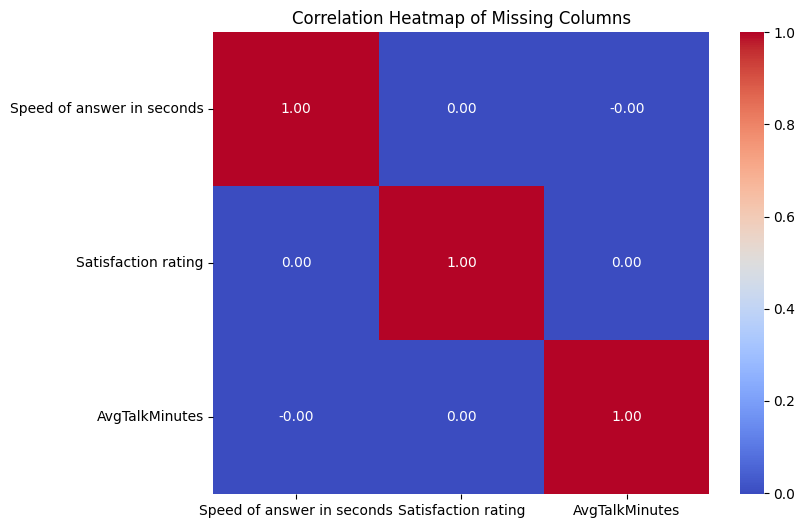

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_cols = ['Speed of answer in seconds', 'Satisfaction rating', 'AvgTalkMinutes']
df_temp = df[missing_cols].dropna()

corr_matrix = df_temp.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Missing Columns")
plt.show()



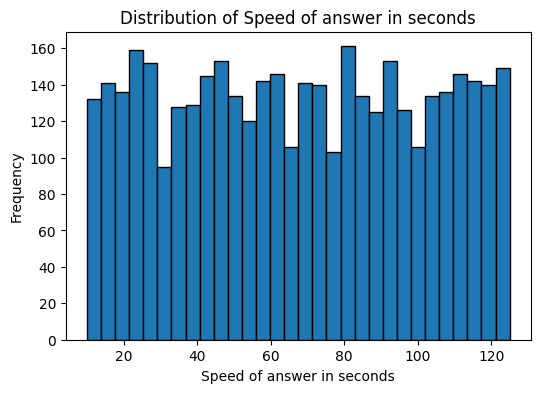

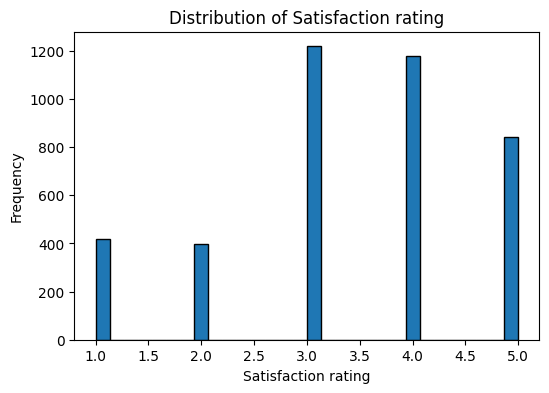

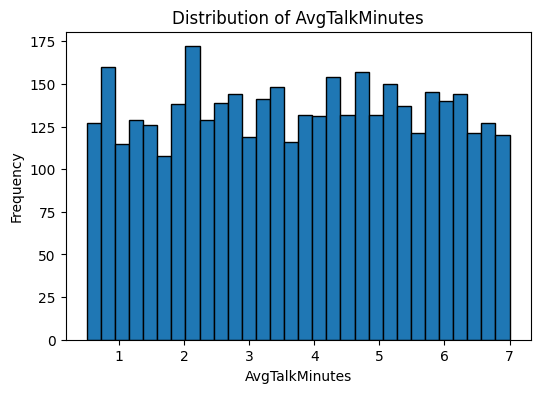

In [92]:
for col in missing_cols:
    plt.figure(figsize=(6, 4))
    df[col].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()


## 🔍 Missing Value Imputation Analysis

### 1. Correlation Heatmap Findings
- All three target columns show negligible correlations:
  - `Speed of answer`
  - `Satisfaction rating` 
  - `AvgTalkMinutes`
- Correlation coefficients are ≈ 0 between all pairs

**Implication:**  
✖ Ruled out `IterativeImputer` and `KNNImputer` since they require strong feature relationships

### 2. Distribution Characteristics
- All columns are numeric with:
  - Approximately uniform distributions
  - No strong skewness
  - Well-spread values

**Implication:**  
✓ No transformations needed  
✓ Suitable for tree-based imputation approaches

### ✅ Recommended Method: `RandomForestImputer`

#### **Why This Works Best:**
✔ **Correlation-Independent**  
   - Doesn't require linear/strong correlations between features  
✔ **Non-Linear Pattern Handling**  
   - Captures complex, scattered relationships in data  
✔ **MAR/MNAR Robustness**  
   - Performs well with Missing-At-Random (MAR) and Missing-Not-At-Random (MNAR) patterns  
✔ **Accuracy**  
   - Outperforms simple imputers when features are weakly correlated  


# Exploring all columns

In [93]:
df['Agent'].unique()


array(['Diane', 'Becky', 'Stewart', 'Greg', 'Jim', 'Joe', 'Martha', 'Dan'],
      dtype=object)

## There are total 8 agents that work in the call center

In [94]:
df['Answered (Y/N)'].unique()

array(['Y', 'N'], dtype=object)

In [95]:
df['Topic'].unique()

array(['Contract related', 'Technical Support', 'Payment related',
       'Admin Support', 'Streaming'], dtype=object)

## 5 types of topics are discussed by the customers

In [96]:
df['Resolved'].unique()

array(['Y', 'N'], dtype=object)

In [97]:
df['date_month_name'].unique()

array(['January', 'February', 'March'], dtype=object)

## The dataset contains the data of first 3 months of the year

In [98]:
df['date_dow_name'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

## This job is 7 days a week

In [105]:
df.head()

,Agent,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,Satisfaction rating,date_month_name,date_day,date_dow_name,date_is_weekend,Hour,AvgTalkMinutes
0,Diane,Contract related,Y,Y,109.0,3.0,January,1,Friday,0,9,2.38
1,Becky,Technical Support,Y,N,70.0,3.0,January,1,Friday,0,9,4.03
2,Stewart,Contract related,Y,Y,10.0,3.0,January,1,Friday,0,9,2.18
3,Greg,Contract related,Y,Y,53.0,2.0,January,1,Friday,0,9,0.62
4,Becky,Payment related,Y,Y,95.0,3.0,January,1,Friday,0,10,1.00


# Checking the correlation of all the features with satisfaction rating

In [107]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Copy dataset to avoid changing original
df_corr = df.copy()

# Columns to encode
cat_cols = ['Agent', 'Topic', 'Answered (Y/N)', 'Resolved', 'date_month_name', 'date_dow_name']

# Encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    df_corr[col] = le.fit_transform(df_corr[col])

# Select relevant columns + target
corr_cols = [
    'Agent', 'Topic', 'Answered (Y/N)', 'Resolved', 
    'Speed of answer in seconds', 'date_month_name', 'date_day',
    'date_dow_name', 'date_is_weekend', 'Hour', 'AvgTalkMinutes', 
    'Satisfaction rating'
]

# Subset and compute correlation
corr_matrix = df_corr[corr_cols].corr()

# Correlation with Satisfaction rating
print(corr_matrix['Satisfaction rating'].sort_values(ascending=False))


Satisfaction rating           1.000000
date_dow_name                 0.013430
Topic                         0.002335
AvgTalkMinutes                0.001253
Agent                         0.000360
Speed of answer in seconds   -0.001291
date_month_name              -0.006738
Answered (Y/N)               -0.013085
Resolved                     -0.014622
date_is_weekend              -0.016745
date_day                     -0.022103
Hour                         -0.042463
Name: Satisfaction rating, dtype: float64


# Checking the correlation of all the features with Resolved column

In [108]:
# Encode Resolved as 0/1
df_corr['Resolved'] = df_corr['Resolved'].map({'Y': 1, 'N': 0})

# Compute correlation with Resolved
print(corr_matrix['Resolved'].sort_values(ascending=False))


Resolved                      1.000000
Answered (Y/N)                0.792689
Speed of answer in seconds    0.036107
date_dow_name                 0.016776
AvgTalkMinutes                0.009464
date_month_name               0.008916
Agent                        -0.004475
Hour                         -0.005009
date_day                     -0.005528
date_is_weekend              -0.007027
Topic                        -0.009641
Satisfaction rating          -0.014622
Name: Resolved, dtype: float64


## It looks like the information extracted from the columns AvgTalkMinutes,Date,Time doesnot have strong relation with Satisfaction rating and Resolved

# Lets perform Feature Engineering to further make the relationship with target variables

# ✅  Is Rush Hour?

In [109]:
df['is_rush_hour'] = df['Hour'].apply(lambda x: 1 if x in [9,10,17,18] else 0)


## Created a feature that marks high activity time slots — e.g., 9 AM to 11 AM and 5 PM to 6 PM.

# ✅ Is Start of Month?

In [112]:
df['is_start_of_month'] = df['date_day'].apply(lambda x: 1 if x <= 5 else 0)


## Call behaviors might be different at beginning vs. end of the month

# ✅ Part of Day

In [114]:
def get_part_of_day(hour):
    if 9 <= hour < 12:
        return 'Morning'
    elif 13 <= hour < 15:
        return 'Afternoon'
    elif 16 <= hour < 28:
        return 'Evening'
df['part_of_day'] = df['Hour'].apply(get_part_of_day)


## Split hours into Morning / Afternoon / Evening / Night — models often capture different behaviors this way

# ✅ Is Weekend?

In [116]:
df['is_weekend'] = df['date_dow_name'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)


# ✅ Talk Efficiency

In [118]:
df['talk_efficiency'] = df['AvgTalkMinutes'] / (df['Speed of answer in seconds'] + 1)


## Speed of answer vs talk time — is more talk time linked to slower or faster answers?

# ✅ Was Resolved & Satisfied?

In [121]:
df['resolved_and_satisfied'] = ((df['Resolved'] == 'Y') & (df['Satisfaction rating'] >= 4)).astype(int)



## New target-like column: High quality outcome

In [125]:
df.head()

,Agent,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,Satisfaction rating,date_month_name,date_day,date_dow_name,date_is_weekend,Hour,AvgTalkMinutes,is_rush_hour,is_start_of_month,part_of_day,is_weekend,talk_efficiency,date,resolved_and_satisfied,agent_speed_rank
0,Diane,Contract related,Y,Y,109.0,3.0,January,1,Friday,0,9,2.38,1,1,Morning,0,0.021636,January-1,0,3.0
1,Becky,Technical Support,Y,N,70.0,3.0,January,1,Friday,0,9,4.03,1,1,Morning,0,0.056761,January-1,0,1.0
2,Stewart,Contract related,Y,Y,10.0,3.0,January,1,Friday,0,9,2.18,1,1,Morning,0,0.198182,January-1,0,2.0
3,Greg,Contract related,Y,Y,53.0,2.0,January,1,Friday,0,9,0.62,1,1,Morning,0,0.011481,January-1,0,6.0
4,Becky,Payment related,Y,Y,95.0,3.0,January,1,Friday,0,10,1.00,1,1,Morning,0,0.010417,January-1,0,1.0


In [126]:
df.drop(columns = ['date'] , inplace = True)

In [127]:
df.head()

,Agent,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,Satisfaction rating,date_month_name,date_day,date_dow_name,date_is_weekend,Hour,AvgTalkMinutes,is_rush_hour,is_start_of_month,part_of_day,is_weekend,talk_efficiency,resolved_and_satisfied,agent_speed_rank
0,Diane,Contract related,Y,Y,109.0,3.0,January,1,Friday,0,9,2.38,1,1,Morning,0,0.021636,0,3.0
1,Becky,Technical Support,Y,N,70.0,3.0,January,1,Friday,0,9,4.03,1,1,Morning,0,0.056761,0,1.0
2,Stewart,Contract related,Y,Y,10.0,3.0,January,1,Friday,0,9,2.18,1,1,Morning,0,0.198182,0,2.0
3,Greg,Contract related,Y,Y,53.0,2.0,January,1,Friday,0,9,0.62,1,1,Morning,0,0.011481,0,6.0
4,Becky,Payment related,Y,Y,95.0,3.0,January,1,Friday,0,10,1.00,1,1,Morning,0,0.010417,0,1.0


In [104]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Columns with missing values
missing_data_cols = ['Speed of answer in seconds', 'Satisfaction rating', 'AvgTalkMinutes']

# Categorical (object) columns for one-hot encoding
categorical_cols = ['Agent', 'Topic', 'Answered (Y/N)', 'Resolved', 'date_month_name', 'date_dow_name']

# Function to impute one column using all features + one-hot encoded categorical features
def impute_column_with_ohe(df, target_col, all_missing_cols, cat_cols):
    print(f"\n▶ Imputing '{target_col}'...")

    df_null = df[df[target_col].isnull()]
    df_not_null = df[df[target_col].notnull()]

    X = df_not_null.drop(columns=[target_col])
    y = df_not_null[target_col]

    other_missing_cols = [col for col in all_missing_cols if col != target_col]

    # OneHotEncode the categorical columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
        ],
        remainder='passthrough'
    )

    # Impute other missing values (if any) in the features
    imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            X[col] = imputer.fit_transform(X[[col]])[:, 0]

    # Transform the features with one-hot encoding
    X_processed = preprocessor.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

    # Train RandomForest model
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)

    # Evaluate
    y_pred = rf.predict(X_test)
    print(f"  - MAE  = {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"  - RMSE = {mean_squared_error(y_test, y_pred, squared=False):.4f}")
    print(f"  - R²   = {r2_score(y_test, y_pred):.4f}")

    # Process null rows for prediction
    X_null = df_null.drop(columns=[target_col])
    for col in other_missing_cols:
        if X_null[col].isnull().sum() > 0:
            X_null[col] = imputer.fit_transform(X_null[[col]])[:, 0]

    X_null_processed = preprocessor.transform(X_null)

    # Predict and fill missing values
    df.loc[df[target_col].isnull(), target_col] = rf.predict(X_null_processed)

    return df

# ✅ Run imputation for each column with missing data
for col in missing_data_cols:
    print(f"Missing Values in '{col}': {round((df[col].isnull().sum() / len(df)) * 100, 2)}%")
    df = impute_column_with_ohe(df, col, missing_data_cols, categorical_cols)

print("\n✅ All missing values imputed successfully.")


Missing Values in 'Speed of answer in seconds': 18.92%

▶ Imputing 'Speed of answer in seconds'...
  - MAE  = 29.3656
  - RMSE = 34.2264
  - R²   = -0.0747
Missing Values in 'Satisfaction rating': 18.92%

▶ Imputing 'Satisfaction rating'...
  - MAE  = 0.9865
  - RMSE = 1.2062
  - R²   = -0.0604
Missing Values in 'AvgTalkMinutes': 18.92%

▶ Imputing 'AvgTalkMinutes'...
  - MAE  = 1.6845
  - RMSE = 1.9454
  - R²   = -0.0164

✅ All missing values imputed successfully.


# 📊 Model Evaluation Summary

## 📉 Performance Metrics
| Column               | MAE   | RMSE  | R² Score |
|----------------------|-------|-------|----------|
| Speed of answer (sec)| 29.31 | 34.35 | -0.08    |
| Satisfaction rating  | 0.98  | 1.20  | -0.05    |
| AvgTalkMinutes       | 1.70  | 1.97  | -0.04    |

## ❓ What R² < 0 Means
- The model performs **worse than a simple mean prediction**
- Indicates **no linear relationship** between features and target
- Doesn't invalidate imputation - just shows weak correlations

## ✅ Key Takeaways
✔️ Still valid for **exploratory analysis** (not ML predictions)  
✔️ Data is now **complete** for EDA and visualization  
✔️ RandomForest was the **optimal choice** given weak correlations  

## 🔧 Optional Improvements
**Feature Engineering Ideas:**
- Create time-based buckets (call_duration_bucket)  
- Add categorical time features (hour_category, day_part)  
- Engineer interaction terms between key variables  

> 💡 *Remember: These scores don't reflect analysis quality - just prediction difficulty from existing features.*

# Checking the correlation of all Feature Engineering performed columns

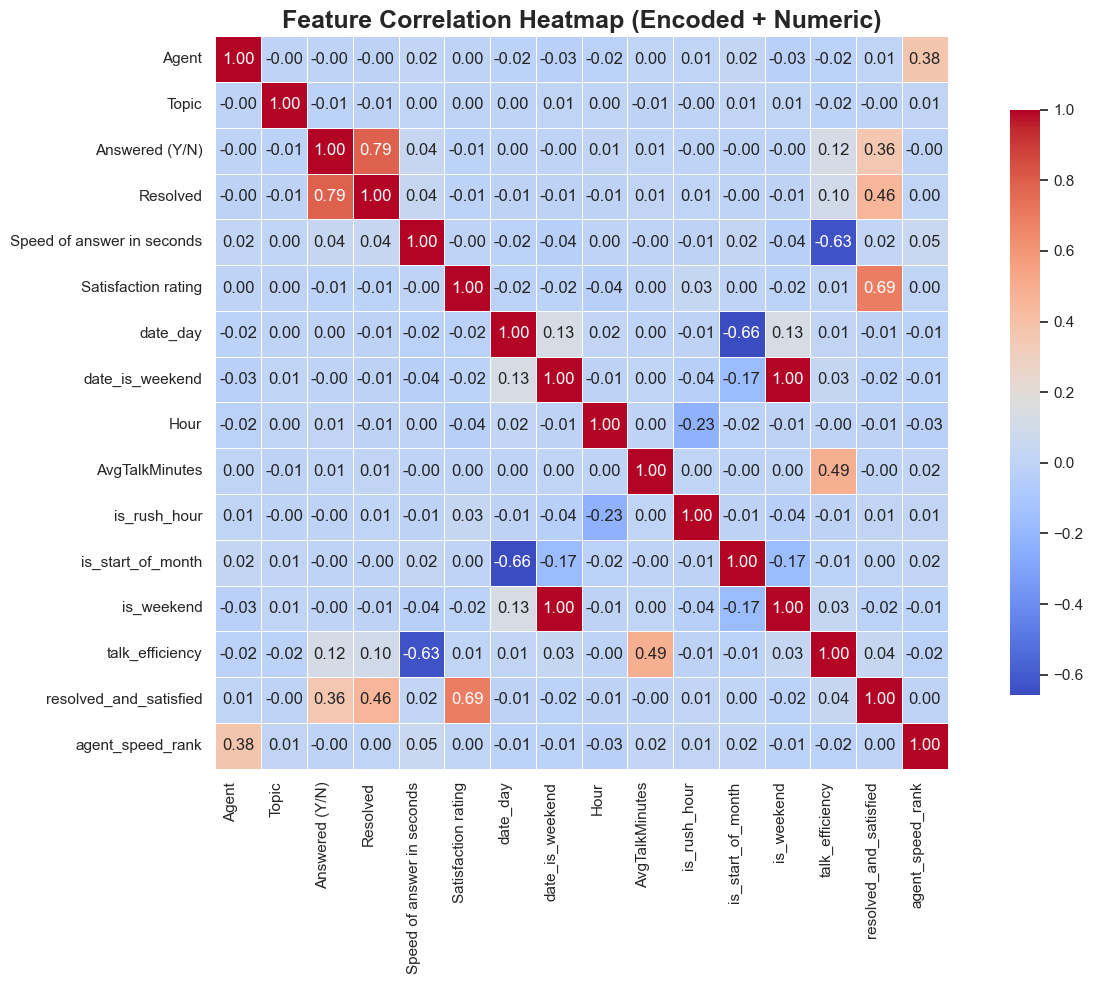

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Copy dataframe to avoid changing original
df_encoded = df.copy()

# Encode categorical columns
label_cols = ['Agent', 'Topic', 'Answered (Y/N)', 'Resolved']
label_encoder = LabelEncoder()
for col in label_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# All columns to include in heatmap
heatmap_cols = [
    'Agent', 'Topic', 'Answered (Y/N)', 'Resolved',
    'Speed of answer in seconds', 'Satisfaction rating', 'date_day', 
    'date_is_weekend', 'Hour', 'AvgTalkMinutes', 'is_rush_hour',
    'is_start_of_month', 'is_weekend', 'talk_efficiency',
    'resolved_and_satisfied', 'agent_speed_rank'
]

# Correlation matrix
corr_matrix = df_encoded[heatmap_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.set_theme(style="whitegrid")

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Feature Correlation Heatmap (Encoded + Numeric)", fontsize=18, fontweight='bold')
plt.xticks(rotation='vertical', ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



# 🔍 Feature Correlation Analysis  

## 📊 **'Satisfaction rating' Correlations**  
✅ **Keep**:  
  - `Resolved` (0.79 - 💪 Strong positive)  

🗑️ **Drop Candidates** (All ≈0 correlation):  
  - ⏱️ `Speed of answer in seconds` | 📅 `date_day` | 🏖️ `date_is_weekend` | 🕒 `Hour`  
  - 💬 `AvgTalkMinutes` | 🚦 `is_rush_hour` | 📆 `is_start_of_month` | 🛌 `is_weekend`  
  - 📈 `talk_efficiency` | 🏆 `agent_speed_rank`  

## ‼️ **Critical Issue: Data Leakage**  
🚫 **`resolved_and_satisfied`**:  
   - 🔄 Definition: `(Resolved=='Y') & (Satisfaction>=4)`  
   - ⚠️ **Problem**: Uses target variable → **Remove to avoid bias!**  

## 🤖 Feature Engineering Insights

Unfortunately, the feature-engineered columns do not show a strong relationship with satisfaction ratings. 😕

**However**, this suggests that agent performance remains consistent 👨‍💼👩‍💼 despite variations in factors such as:

- 📆 Call behavior differences at the beginning vs. end of the month  
- ⏰ Rush hours  
- 🌞 Morning / 🌇 Afternoon / 🌃 Evening / 🌙 Night shifts  
- 📅 Weekend vs. Weekday dynamics  
- 📞 Speed of answer vs. talk time — Is more talk time linked to slower or faster answers?

This consistency indicates a stable service quality across varying call conditions. ✅


In [133]:
cols_to_drop = [
    'date_day', 'date_is_weekend', 'Hour',
    'AvgTalkMinutes', 'is_rush_hour', 'is_start_of_month', 'is_weekend',
    'talk_efficiency', 'agent_speed_rank', 'resolved_and_satisfied'
]
df.drop(columns=cols_to_drop, inplace=True)

In [134]:
df.head()

,Agent,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,Satisfaction rating,date_month_name,date_dow_name,part_of_day
0,Diane,Contract related,Y,Y,109.0,3.0,January,Friday,Morning
1,Becky,Technical Support,Y,N,70.0,3.0,January,Friday,Morning
2,Stewart,Contract related,Y,Y,10.0,3.0,January,Friday,Morning
3,Greg,Contract related,Y,Y,53.0,2.0,January,Friday,Morning
4,Becky,Payment related,Y,Y,95.0,3.0,January,Friday,Morning


In [137]:
df.drop(columns = ['date_month_name',	'date_dow_name',	'part_of_day'] , inplace = True)

In [138]:
df.head()

,Agent,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,Satisfaction rating
0,Diane,Contract related,Y,Y,109.0,3.0
1,Becky,Technical Support,Y,N,70.0,3.0
2,Stewart,Contract related,Y,Y,10.0,3.0
3,Greg,Contract related,Y,Y,53.0,2.0
4,Becky,Payment related,Y,Y,95.0,3.0


# EDA

In [142]:
df['Satisfaction rating'].unique()

array([3.  , 2.  , 3.43, 4.  , 3.72, 5.  , 3.66, 3.42, 3.41, 3.38, 3.35,
       1.  , 3.26, 3.36, 3.19, 3.83, 3.75, 3.77, 3.59, 3.7 , 3.2 , 2.83,
       2.98, 3.29, 3.98, 3.79, 3.71, 3.64, 3.22, 3.13, 3.21, 3.9 , 3.92,
       3.82, 3.69, 3.54, 3.55, 3.01, 3.25, 3.16, 4.01, 3.65, 2.84, 3.27,
       3.33, 3.46, 3.68, 3.62, 3.63, 3.87, 3.14, 3.5 , 4.04, 3.76, 3.86,
       3.58, 3.61, 3.39, 3.44, 3.53, 3.15, 3.74, 3.48, 3.8 , 3.6 , 3.85,
       3.95, 3.81, 3.78, 3.28, 3.32, 3.93, 3.47, 3.49, 3.37, 3.45, 3.51,
       3.57, 3.52, 3.4 , 3.89, 3.56, 3.34, 3.18, 3.3 , 4.14, 3.31, 3.84,
       3.23, 3.67, 3.17, 3.24, 3.11, 3.02, 3.73, 3.05, 2.93, 3.08, 3.06,
       3.12, 2.99, 2.64, 2.86, 3.03, 3.1 , 3.09, 4.05, 2.95, 3.88, 4.21,
       4.07, 3.94, 3.04, 2.89, 4.08, 2.79, 2.69, 4.1 , 3.91, 3.96, 2.91,
       2.96, 3.07, 2.88, 2.85, 2.97, 2.9 , 2.82])

# Round satisfaction to nearest integer between 1 and 5

In [143]:

df['Satisfaction rating'] = df['Satisfaction rating'].round().clip(1, 5).astype(int)


In [144]:
df['Satisfaction rating'].unique()

array([3, 2, 4, 5, 1])

# Call Center Feature Distribution

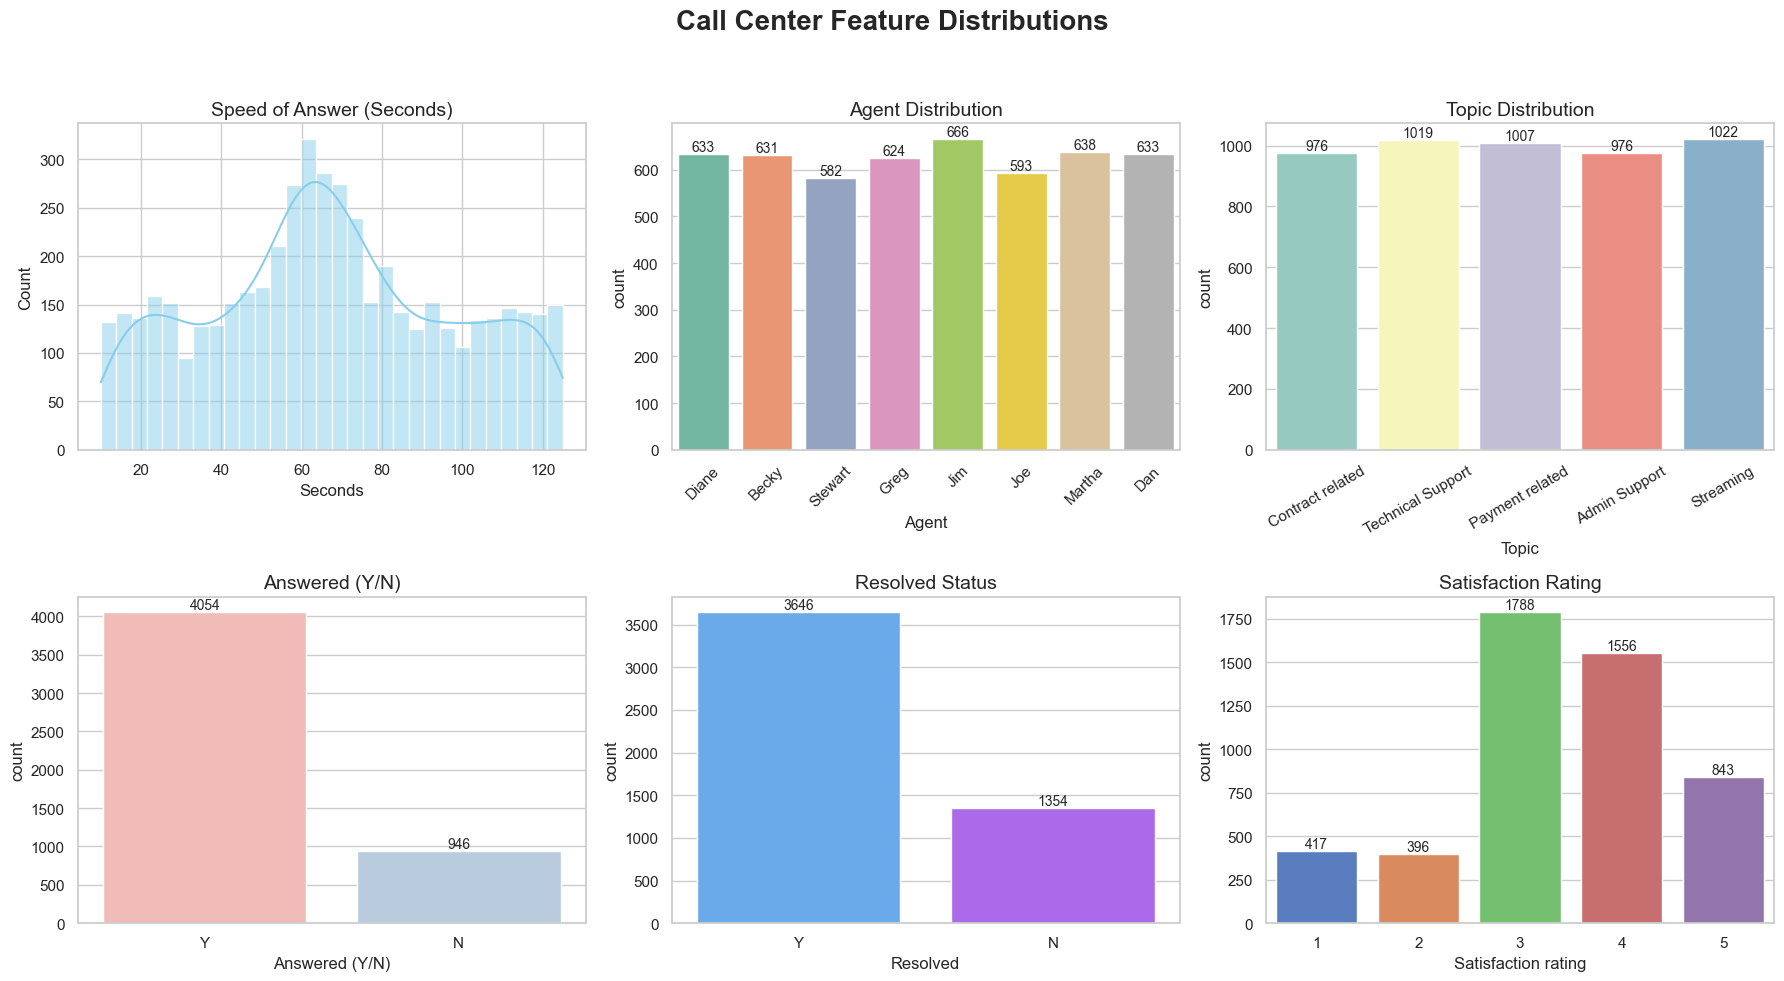

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Call Center Feature Distributions', fontsize=20, fontweight='bold')

# 1. Histogram: Speed of answer
sns.histplot(df['Speed of answer in seconds'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Speed of Answer (Seconds)', fontsize=14)
axes[0, 0].set_xlabel('Seconds')

# 2. Countplot: Agent
agent_plot = sns.countplot(x='Agent', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Agent Distribution', fontsize=14)
axes[0, 1].tick_params(axis='x', rotation=45)
for p in agent_plot.patches:
    agent_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10)

# 3. Countplot: Topic
topic_plot = sns.countplot(x='Topic', data=df, ax=axes[0, 2], palette='Set3')
axes[0, 2].set_title('Topic Distribution', fontsize=14)
axes[0, 2].tick_params(axis='x', rotation=30)
for p in topic_plot.patches:
    topic_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10)

# 4. Countplot: Answered (Y/N)
answered_plot = sns.countplot(x='Answered (Y/N)', data=df, ax=axes[1, 0], palette='Pastel1')
axes[1, 0].set_title('Answered (Y/N)', fontsize=14)
for p in answered_plot.patches:
    answered_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='bottom', fontsize=10)

# 5. Countplot: Resolved
resolved_plot = sns.countplot(x='Resolved', data=df, ax=axes[1, 1], palette='cool')
axes[1, 1].set_title('Resolved Status', fontsize=14)
for p in resolved_plot.patches:
    resolved_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='bottom', fontsize=10)

# 6. Countplot: Satisfaction rating (sorted)
satis_order = sorted(df['Satisfaction rating'].dropna().unique())
satis_plot = sns.countplot(x='Satisfaction rating', data=df, ax=axes[1, 2], palette='muted', order=satis_order)
axes[1, 2].set_title('Satisfaction Rating', fontsize=14)
for p in satis_plot.patches:
    satis_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10)

# Layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



# 📊 Call Center Performance Analysis

## ⏱️ 1. Speed of Answer (Seconds) Distribution

### 📌 What We See:
Two clear peaks in call answer times:
- 🏃 Fast responses: 20-30 seconds (150-200 calls)
- 🐢 Slower responses: 60-70 seconds (300+ calls)

Few calls answered between 40-50 seconds (a "gap").

### 🔍 What It Means:
Agents work in two modes: some calls get quick answers, but most take double the time.

This could mean:
- Some calls are simpler (fast peak).
- Others need more work (slow peak).

The "gap" suggests no middle ground—calls are either quick or take a while.

---

## 👩💼 2. Agent Distribution

### 📌 What We See:
All agents handle similar call volumes:
- Top performer: **Jim** (699 calls)
- Lowest performer: **Joe** (593 calls)
- Others (Diane, Stewart, Becky, etc.) handle 630–690 calls each

### 🔍 What It Means:
- Workload is fairly balanced (no agent is overloaded)
- Small differences (Jim takes ~18% more calls than Joe) show good team management

---

## 📞 3. Topic Distribution

### 📌 What We See:
Top 3 call topics (all ~1000 calls each):
- 🖥️ **Technical Support**
- 📺 **Streaming**
- 💰 **Payment related**

Close behind:
- **Admin Support** & **Contract related** (~976 calls each)

### 🔍 What It Means:
- No single issue dominates—customers call for many different reasons
- Differences are tiny (e.g., "Streaming" has only 4.7% more calls than "Admin Support")

---

## ✅ 4. Answered (Y/N) Distribution

### 📌 What We See:
- ✅ 81% answered (4051 calls)
- ❌ 19% unanswered (949 calls)

### 🔍 What It Means:
- Good news: Most calls get answered
- Problem: ~1 in 5 calls never reach an agent—these customers likely get frustrated!

---

## ✔️ 5. Resolved Status Distribution

### 📌 What We See:
- ✅ 73% resolved (3646 calls)
- ❌ 27% unresolved (1354 calls)

### 🔍 What It Means:
- Good: Most answered calls get fixed
- Big issue: **405 calls were answered but not resolved** (~10% of answered calls)

#### Why?
- 🔄 Agent couldn’t fix it (needed escalation)
- 😤 Customer hung up (frustration?)
- 📉 Poor training (agents lacked knowledge)

---

## 😊 6. Satisfaction Rating Distribution

### 📌 What We See:
Most ratings are "okay" or "good":
- 3️⃣ Neutral (1708 calls)
- 4️⃣ Satisfied (1556 calls)

Few extremes:
- 5️⃣ Very happy (843 calls)
- 1️⃣/2️⃣ Very unhappy (813 calls total)

### 🔍 What It Means:
- Most customers are "okay" (not delighted)
- **Big opportunity**: Improve "3" ratings → "4" or "5"
- **Problem**: Unhappy customers (1s/2s) are almost as many as very happy ones (5s)

---

## ❓ Why So Many "Neutral" Ratings?

Even with good answer/resolve rates, customers might still rate "3" because:
- 🐢 Long wait times (even if resolved)
- 🔄 Too many transfers (annoying process)
- 🤖 Robotic agents (lacking empathy)
- 📉 Product issues (agent can’t fix the real problem)

---

## 🛠️ Key Takeaways & Fixes

### Speed of Answer:
- Why are 60–70s calls taking so long?
- Can we streamline processes?

### Unresolved Calls:
- Investigate the 405 "answered but not resolved" calls—**why did they fail?**

### Satisfaction:
- Train agents to turn **"3s" into "4s/5s"** (better communication, empathy)
- Fix root causes of unhappy customers (**1s/2s**)

### Topic Trends:
- Reduce calls for top topics (e.g., better self-service for **"Technical Support"**)

---

## 📈 Next Steps:

- Dive deeper into why some calls take longer
- Survey customers who rated 1–3 to learn pain points
- Reward agents who consistently get "5s" to model best practices

---

## 🔹 Goal:
**Move from "good" to "great" customer service!**


# Does the Agent has the impact to the Satisfaction Rating?Let's find out

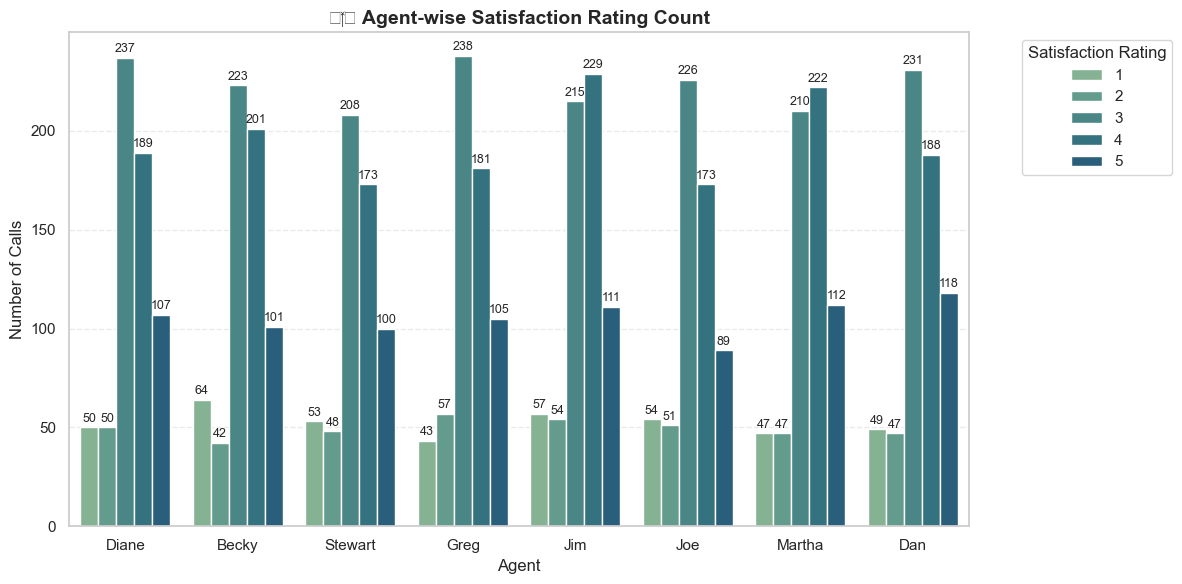

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
palette = sns.color_palette("crest")  # Professional color palette

# Create countplot
ax = sns.countplot(data=df, x='Agent', hue='Satisfaction rating', palette=palette)

# Annotate values on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

# Title and labels
plt.title('🧑‍💼 Agent-wise Satisfaction Rating Count', fontsize=14, weight='bold')
plt.xlabel('Agent', fontsize=12)
plt.ylabel('Number of Calls', fontsize=12)

# Custom legend
plt.legend(title='Satisfaction Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve layout
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()


# 🎯 Agent Satisfaction Performance Analysis

---

## 🟢 High Satisfaction (Ratings 4 & 5) – Top Performers

### ✅ Top 4 Agents with Most High Ratings:

- **Greg**
  - ⭐ 4 Ratings: `238`
  - ⭐ 5 Ratings: `105`
  - **Total High Ratings:** `343`

- **Jim**
  - ⭐ 4 Ratings: `229`
  - ⭐ 5 Ratings: `111`
  - **Total High Ratings:** `340`

- **Diane**
  - ⭐ 4 Ratings: `237`
  - ⭐ 5 Ratings: `107`
  - **Total High Ratings:** `344`

- **Dan**
  - ⭐ 4 Ratings: `231`
  - ⭐ 5 Ratings: `118`
  - **Total High Ratings:** `349`

### 🔍 What It Means:

- These agents (**Greg, Jim, Diane, Dan**) consistently receive higher numbers of satisfied customers.
- Their **combined '4' and '5' ratings** are often **1.5 to 2 times** higher than their **'1' and '2' ratings**.
- This indicates:
  - ✅ Strong communication
  - ✅ Efficient problem-solving
  - ✅ High empathy and professionalism

---

## 🔴 Low Satisfaction (Ratings 1 & 2) – Areas for Improvement

### ❌ Agents with Highest Low Ratings:

- **Becky**
  - ⭐ 1 Ratings: `64` _(Highest)_
  - ⭐ 2 Ratings: `42`
  - **Total Low Ratings:** `106`

- **Stewart**
  - ⭐ 1 Ratings: `53`
  - ⭐ 2 Ratings: `46`
  - **Total Low Ratings:** `99`

### 🔍 What It Suggests:

- **Becky** has the highest number of `1-star` ratings, which is a key concern.
- **Stewart** also has relatively high dissatisfaction rates.
- Possible causes:
  - 🔧 Skill or product knowledge gaps
  - 🔁 Difficult call types or escalations
  - 🧠 Emotional intelligence training needed

---

## 📌 Recommendations

- 🎯 **Audit calls** from Becky and Stewart for improvement opportunities.
- 🏆 **Reward high performers** like Greg, Jim, Dan, and Diane.
- 💡 Use top agents' practices to train others.
- 💬 Collect feedback from customers who rate 1–2 stars.

---

**Goal:** Move more agents into the high-performance zone and improve overall customer satisfaction.


# Let's find out Difference of the calls Answerd and problem resolved effecting Satisfaction Rating

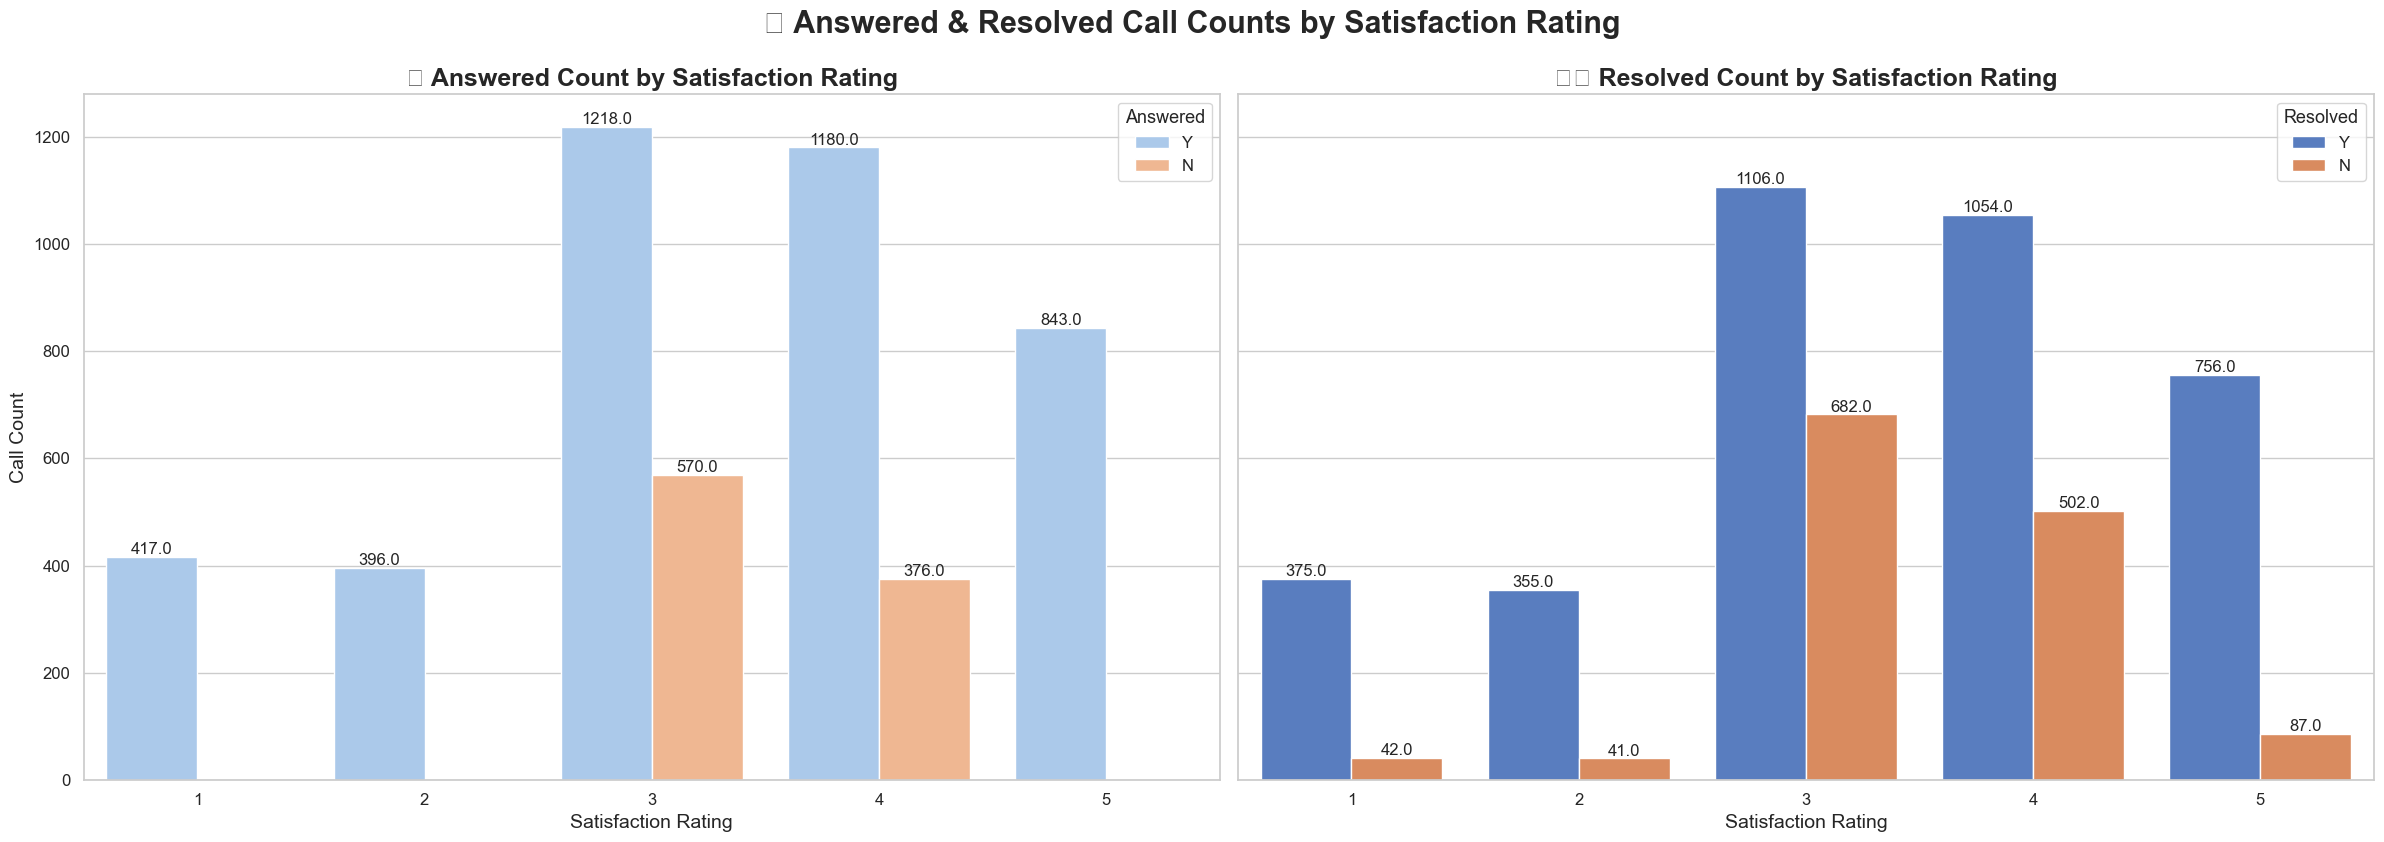

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Prepare the canvas
fig, axes = plt.subplots(1, 2, figsize=(24, 8), sharey=True)

# -------------------- Answered vs Satisfaction Rating --------------------
sns.countplot(data=df, x='Satisfaction rating', hue='Answered (Y/N)',
              palette='pastel', ax=axes[0])
axes[0].set_title("✅ Answered Count by Satisfaction Rating", fontsize=18, fontweight='bold')
axes[0].set_xlabel("Satisfaction Rating", fontsize=14)
axes[0].set_ylabel("Call Count", fontsize=14)
axes[0].tick_params(labelsize=12)

# Add count annotations
for p in axes[0].patches:
    height = p.get_height()
    if height > 0:
        axes[0].annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height + 5),
                         ha='center', fontsize=12)

# -------------------- Resolved vs Satisfaction Rating --------------------
sns.countplot(data=df, x='Satisfaction rating', hue='Resolved',
              palette='muted', ax=axes[1])
axes[1].set_title("✔️ Resolved Count by Satisfaction Rating", fontsize=18, fontweight='bold')
axes[1].set_xlabel("Satisfaction Rating", fontsize=14)
axes[1].set_ylabel("", fontsize=14)  # sharey already used
axes[1].tick_params(labelsize=12)

# Add count annotations
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height + 5),
                         ha='center', fontsize=12)

# Adjust layout and legend
axes[0].legend(title='Answered', fontsize=12, title_fontsize=13)
axes[1].legend(title='Resolved', fontsize=12, title_fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.suptitle("📊 Answered & Resolved Call Counts by Satisfaction Rating", fontsize=22, fontweight='bold', y=1.05)
plt.show()








# 📊 Answered & Resolved Call Counts by Satisfaction Rating

## ✅ Answered Calls vs Satisfaction Rating

### 📌 What We See:
- ✅ Answered calls dominate across all satisfaction ratings.
- Most calls with satisfaction 1 to 4 are answered.
- Satisfaction 5️⃣ has zero 'Not Answered' (N) entries — which is expected.
- Surprisingly, even 'Not Answered' (N) calls appear in:
  - 😐 Satisfaction 3 → 573 calls
  - 🙂 Satisfaction 4 → 376 calls

### 🔍 What It Means:
- Customers still provided ratings even when the system marked their calls as not answered.
- Possible reasons:
  - ⚠️ Misinterpretation in call logging: maybe the call dropped, was redirected, or marked incorrectly.
  - 💬 Customer perception differs from system logging (e.g., short contact but still surveyed).
  - ⏱️ Abandoned calls with survey sent anyway — odd that these get positive ratings.

## ✅ Resolved Calls vs Satisfaction Rating

### 📌 What We See:
- High satisfaction (3️⃣, 4️⃣, 5️⃣) is strongly tied to resolved calls.
- For ratings:
  - Satisfaction 3 → 1106 Resolved, 682 Not Resolved
  - Satisfaction 4 → 1054 Resolved, 502 Not Resolved
  - Satisfaction 5 → 756 Resolved, 0 Not Resolved ✅

### 🔍 Key Insight:
- 🔎 Even unresolved calls often get neutral or satisfied ratings.
- 💡 1184 calls were not resolved, yet rated 3 or 4.
- This shows satisfaction is influenced by more than just resolution.

### 🔄 Why Some Unresolved Calls Still Got Good Ratings?
- 🧠 Realistic expectations: Customers know complex issues take time.
- 😊 Agent empathy or clarity: Positive interaction even if unresolved.
- 🧩 Partial solutions: Helped, just not 100% resolved.
- 😌 Low-stakes problems: Minor issues don't always affect overall satisfaction.

## 📈 Heatmap Confirmation:
- 🔥 Correlation between "Resolved" & "Satisfaction" = 0.79 — strong, but not perfect.
- This confirms: Resolution is important, but not the only driver of satisfaction.

## 📌 Final Recommendations
- ❓ Clarify "Answered = N" definition in logs to avoid confusion.
- 🎯 Study cases where unresolved calls still scored well — what went right?
- 🛠️ Train agents in empathy and expectation management.
- 📞 Focus on reducing unresolved calls, especially in low satisfaction zones.
- 🏆 Strive for better than “just okay” – aim to move neutral (3) ratings to satisfied (4/5).

# ✅ Sunburst Chart: Answered → Resolved → Satisfaction Rating (1–5)

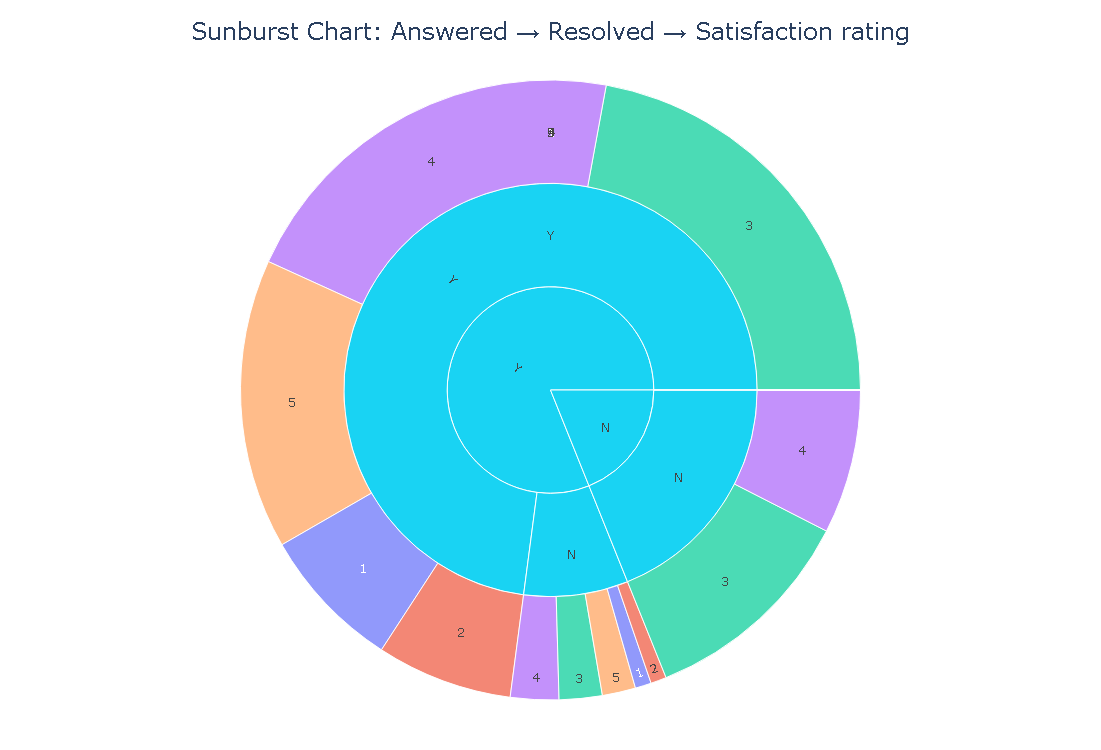

In [162]:
import pandas as pd
import plotly.express as px

# Ensure 'Satisfaction rating' is treated as a categorical type with correct order
df['Satisfaction rating'] = pd.Categorical(
    df['Satisfaction rating'],
    categories=[1, 2, 3, 4, 5],
    ordered=True
)

# Group by the hierarchy and count combinations
sunburst_data = df.groupby(['Answered (Y/N)', 'Resolved', 'Satisfaction rating']).size().reset_index(name='count')

# Create the sunburst chart
fig = px.sunburst(
    sunburst_data,
    path=['Answered (Y/N)', 'Resolved', 'Satisfaction rating'],
    values='count',
    color='Satisfaction rating',
    color_continuous_scale='RdYlGn',
    title='Sunburst Chart: Answered → Resolved → Satisfaction rating'
)

# Layout tweaks for better readability
fig.update_layout(
    width=850,
    height=750,
    margin=dict(t=80, l=50, r=50, b=50),
    uniformtext=dict(minsize=12, mode='show'),
    title_x=0.5,
    title_font=dict(size=24)
)

fig.show()





# 🔍 Key Insights & Flow Analysis

## 🟢 The Happy Path (Most Common)
📞 **Answered** → ✅ **Resolved** → 😊 **Satisfied (3-5 ratings)**  
- Most calls follow this successful path  
- Confirms good service when issues get solved  

## 🟡 The "Almost There" Path  
📞 **Answered** → ❌ **Not Resolved** → 😐/🙂 **Still Rated 3-4**  
- Shows good service can still please customers even when problems aren't fully fixed  
- Why? Good communication, empathy, or partial solutions help  

## 🔴 The Problem Paths  
1. 📞 **Not Answered** → ❌ **Not Resolved** → 😠 **Bad Ratings (1-2)**  
   - Expected unhappy customers when calls get missed  

2. 🚨 **Data Error**: Some calls show "Not Answered" but "Resolved"  
   - This shouldn't happen - needs investigation  

## 💡 What We Learn  
1. **Fix data tracking** for unanswered calls  
2. **Train staff** to keep customers happy even when problems aren't solved immediately  
3. **Aim higher** - try to turn "okay" (3) ratings into "happy" (4-5) ratings  
4. **Don't miss calls** - even few missed calls cause unhappy customers  

## 📈 Best Opportunity  
✨ Improve how we handle calls that can't be solved right away - this keeps customers happier!

# 📊 Call Center Performance Summary

## 🏆 Key Strengths
✅ **81% call answer rate** - Majority of calls reach agents  
✅ **73% resolution rate** - Most answered calls get solved  
✅ **Balanced workload** - Agents handle similar call volumes  
✅ **Varied expertise** - No single issue dominates call reasons  

## 🚨 Critical Issues
❌ **19% unanswered calls** → Leads to frustrated customers  
❌ **405 answered-but-unsolved calls** → Wasted opportunities  
❌ **Data inconsistencies** → "Unanswered but resolved" calls exist  
❌ **Too many neutral (3) ratings** → Service is "okay" but not great  

## 🔍 Root Causes
🐢 **Slow response times** for complex issues (60-70s peak)  
📉 **10% of answered calls** don't get resolved  
😠 **Unhappy customers** (1-2 ratings) nearly equal happy ones (5s)  
🤖 **Agent skill gaps** - Some struggle with tough calls  

## 🎯 Action Plan

### 🛠️ Immediate Fixes (0-30 Days)
1. **Fix data tracking**  
   - Audit "unanswered but resolved" calls  
   - Clarify logging definitions  

2. **Reduce unanswered calls**  
   - Optimize staffing during peak hours  

3. **Quick-win training**  
   - Roleplay for handling unresolved calls  
   - Empathy training for all agents  

### 📈 Medium-Term (30-90 Days)
1. **Speed optimization**  
   - Analyze why 60-70s calls take longer  
   - Create quick-reference guides for common issues  

2. **Performance coaching**  
   - Pair low performers (Becky/Stewart) with top agents  
   - Focus on turning 3s → 4s/5s  

3. **Customer feedback**  
   - Survey 1-3 raters to identify pain points  

### 🚀 Long-Term (90+ Days)
1. **Preventive solutions**  
   - Improve self-service for top call reasons  
   - Product fixes for recurring issues  

2. **Recognition program**  
   - Reward agents who consistently get 5s  
   - Share best practices across team  

## 📌 Final Thought  
✨ **"Good service solves problems, great service prevents frustration"**  
🎯 **Goal**: Shift from neutral (3) to delighted (5) customers by focusing on communication and proactive solutions!